# E-commerce — Выявление профилей потребления

## Описание 

Имеем небольшой интернет - магазинчик который занимается продажей широкой номенклатуры товаров. В датасете описываются транзакции заказчиков/покупателей, количество проданного, цена и другие показатели. Требуется провести ислледовательский анализ данных и сегментировать клиентов по их предпочтениям для того чтобы увеличить продажи.

Задача: На основе истории покупок сегментировать пользователей и персонализировать предложения для клиентов

Ссылка на презентацию: https://drive.google.com/file/d/1AIrDQsar_gOjJ2EEvch7Othu2Z6hWA5e/view?usp=sharing

## Декомпозиция 

1) Изучение данных. Посмотрю сколько строк, какие данные и столбца представлены, уникальные значений в столбцах, проверю типы данных, минимальную и максимальную даты

2) Предобработка данных. Изменю тип данных(Дата), удалю дубликаты, посмотрю есть ли пропуски, добавлю дополнительные столбцы по дате(день, месяц), добавлю категории

3) Анализ данных. Как пример что может быть:

1) Количество проданных товаров по категориям 2) Общая сумма проданных товаров(цена* количество) по категориям 3) Выделю топ 10 товаров по количеству проданных и по сумме 4) Выделю топ клиентов 5) Оценю средние чеки 6) Посмотрю в какие месяцы какие товары лучше продаются, возможно добавлю сезон(времена года) и по ним тоже построю Возможно добавлю где-то разбивку по годам

4) Сегментация. Сегментирую по среднему чеку, количеству товаров в одном заказе, сумма всех заказов одного покупателя, по средней цене одного товара в заказе, Количество покупок совершенных одним покупателем.Буду использовать k-means



5) Гипотезы

1) различия в среднем чеке заказа между сегментами покупателей. 2) различия в среднем количестве покупаемых товаров



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Декомпозиция" data-toc-modified-id="Декомпозиция-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Декомпозиция</a></span></li><li><span><a href="#Загрузка-данных-и-изучение-общей-информации" data-toc-modified-id="Загрузка-данных-и-изучение-общей-информации-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-датой" data-toc-modified-id="Работа-с-датой-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Работа с датой</a></span></li><li><span><a href="#Работа-с-дубликатами-и-пропусками" data-toc-modified-id="Работа-с-дубликатами-и-пропусками-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Работа с дубликатами и пропусками</a></span></li><li><span><a href="#Категоризация" data-toc-modified-id="Категоризация-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Категоризация</a></span></li><li><span><a href="#Проверка-данных-на-выбросы" data-toc-modified-id="Проверка-данных-на-выбросы-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверка данных на выбросы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#График-по-количеству-товаров-в-одном-заказе" data-toc-modified-id="График-по-количеству-товаров-в-одном-заказе-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>График по количеству товаров в одном заказе</a></span></li><li><span><a href="#Динамика-выручки-магазина" data-toc-modified-id="Динамика-выручки-магазина-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Динамика выручки магазина</a></span></li><li><span><a href="#График-числа-проданных-товаров" data-toc-modified-id="График-числа-проданных-товаров-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>График числа проданных товаров</a></span></li><li><span><a href="#Мединный-чек-клиентов-по-дням" data-toc-modified-id="Мединный-чек-клиентов-по-дням-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Мединный чек клиентов по дням</a></span></li><li><span><a href="#Стоимость-проданных-товаров-по-категориям" data-toc-modified-id="Стоимость-проданных-товаров-по-категориям-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Стоимость проданных товаров по категориям</a></span></li><li><span><a href="#Количество-проданных-товаров-по-категориям" data-toc-modified-id="Количество-проданных-товаров-по-категориям-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Количество проданных товаров по категориям</a></span></li><li><span><a href="#Топ-10-товаров-по-стоимости-проаднного" data-toc-modified-id="Топ-10-товаров-по-стоимости-проаднного-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Топ 10 товаров по стоимости проаднного</a></span></li><li><span><a href="#Товары-лидеры-по-количеству-продаж" data-toc-modified-id="Товары-лидеры-по-количеству-продаж-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Товары-лидеры по количеству продаж</a></span></li><li><span><a href="#Топ-10-клиентов-с-наибольшими-тратами-в-магаизне" data-toc-modified-id="Топ-10-клиентов-с-наибольшими-тратами-в-магаизне-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Топ 10 клиентов с наибольшими тратами в магаизне</a></span></li><li><span><a href="#Продажи-товаров-по-сезонам" data-toc-modified-id="Продажи-товаров-по-сезонам-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>Продажи товаров по сезонам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.11"><span class="toc-item-num">5.11&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Сегментация-клиентов" data-toc-modified-id="Сегментация-клиентов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Сегментация клиентов</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Функция-для-сегментации" data-toc-modified-id="Функция-для-сегментации-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Функция для сегментации</a></span></li><li><span><a href="#Результаты-сегментации-и-анализ" data-toc-modified-id="Результаты-сегментации-и-анализ-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Результаты сегментации и анализ</a></span><ul class="toc-item"><li><span><a href="#Первый-кластер" data-toc-modified-id="Первый-кластер-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Первый кластер</a></span></li><li><span><a href="#Второй-кластер" data-toc-modified-id="Второй-кластер-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Второй кластер</a></span></li><li><span><a href="#Третий-кластер" data-toc-modified-id="Третий-кластер-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Третий кластер</a></span></li><li><span><a href="#Четвертый-кластер" data-toc-modified-id="Четвертый-кластер-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Четвертый кластер</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средний-чек" data-toc-modified-id="Средний-чек-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Средний чек</a></span></li><li><span><a href="#Среднее-количество-покупаемых-товаров" data-toc-modified-id="Среднее-количество-покупаемых-товаров-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Среднее количество покупаемых товаров</a></span></li></ul></li><li><span><a href="#Результаты-работы" data-toc-modified-id="Результаты-работы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Результаты работы</a></span></li></ul></div>

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from plotly import graph_objects as go 
import plotly.express as px
from sklearn.cluster import KMeans 
from scipy import stats as st
import scipy.stats as stats


Изучим имеющиеся в наличии данные

In [2]:
data=pd.read_csv('/datasets/ecommerce_dataset.csv')

In [3]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Всего имеется 6737 строк с данными, представлено 6 столбцов: дата заказа, личный идентификатор клиента, номер заказа, название продукта, количество товара и цена.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Количество товара номер, заказа и дата указаны как int т.е ввиде целого числа. Дату далее потребуется преобразовать к нужному виду. Личный идентификатор клиента и название продукта указаны как object, цена в виде дробного числа, что соответствует действительности

## Предобработка данных 

### Работа с датой 

Для начала приведем столбец с датой к нужному виду

In [5]:
data['date']=pd.to_datetime(data['date'],format='%Y%m%d%H')

Выведем первые 20 значения столбца с датой для проверки

In [6]:
data['date'].head(10)

0   2018-10-01 00:00:00
1   2018-10-01 00:00:00
2   2018-10-01 00:00:00
3   2018-10-01 00:00:00
4   2018-10-01 00:00:00
5   2018-10-01 00:00:00
6   2018-10-01 00:00:00
7   2018-10-01 08:00:00
8   2018-10-01 08:00:00
9   2018-10-01 09:00:00
Name: date, dtype: datetime64[ns]

Определим временные границы датафрейма

In [7]:
min(data['date'])

Timestamp('2018-10-01 00:00:00')

In [8]:
max(data['date'])

Timestamp('2019-10-31 16:00:00')

Выделим из столбца с временем: Дату,год,месяц,день недели

In [9]:
data['YMD']=pd.DatetimeIndex(data['date']).date

In [10]:
data['year']=pd.DatetimeIndex(data['date']).year

In [11]:
data['month']=pd.DatetimeIndex(data['date']).month

In [12]:
data['week_date']=data['date'].dt.day_name()

Посчитаем стоимость каждого заказа для покупателя

In [13]:
data['revenue']=data['quantity']*data['price']

Добавим сезон: Зима, Весна, Лето, Осень

In [14]:
def season1(row):
    season=row['month']
    if season in [10,11]:
        return 'осень'
    elif season in [12,1,2]:
        return 'зима'
    elif season in [3,4,5]:
        return 'весна'
    elif season in [6,7,8]:
        return 'лето'

Применим функцию к датасету и оценим результаты

In [15]:
data['season']=data.apply(season1, axis = 1)

In [16]:
data.head()

,date,customer_id,order_id,product,quantity,price,YMD,year,month,week_date,revenue,season
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018,10,Monday,142.0,осень
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,2018,10,Monday,194.0,осень
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018,10,Monday,179.0,осень
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень


На данном этапе изменили тип данных с толбце с датой, добавили новые столбцы: Дата, год, месяц, день недели, стоимость заказа, сезон

### Работа с дубликатами и пропусками

проверим данные на наличие пропусков

In [17]:
data.isna().sum()#пропусков не обнаружено

date             0
customer_id      0
order_id         0
product          0
quantity         0
price            0
YMD              0
year             0
month            0
week_date        0
revenue          0
season         251
dtype: int64

проверим теперь на дубликаты

In [18]:
data.duplicated().sum()

0

По всем столбцам дубликатов не обнаружено, попробуем поискать дубликаты по всем столбцам кроме даты

In [19]:
dup1=data[['customer_id', 'order_id','product','quantity','price']]

In [20]:
dup1.duplicated().sum()

1864

Всего найдено 1864 дубликата. Удалим их

In [21]:
data=data.drop_duplicates(['customer_id', 'order_id','product','quantity','price'])

In [22]:
data.head()

,date,customer_id,order_id,product,quantity,price,YMD,year,month,week_date,revenue,season
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018,10,Monday,142.0,осень
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,2018,10,Monday,194.0,осень
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018,10,Monday,179.0,осень
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень


Также следует проверить не дублируются заказы у разных покупателей, т.е может быть так что один заказ по какой-то причине записан за 2 покупателями

In [23]:
uniq = data.groupby('order_id')['customer_id'].nunique().sort_values(ascending=False).reset_index()
dup=uniq.query('customer_id>1')
dup11=dup['order_id']
data=data.query('order_id not in @dup11')

Удалим эти строки

Были удалены дубликаты 1865 ед., убраны дублирующие заказы

### Категоризация

In [24]:
data['product']=data['product'].str.lower()

In [25]:
data['product'].nunique()

2329

Всего в столбце product 2341 уникальных значения

Добавим новый столбец: категорию товаров. Для этого выделим первое слово из названия продукта

In [26]:
data['product1']=data['product'].apply(lambda x: x.split(' ')[0].strip())

In [27]:
data.head()

,date,customer_id,order_id,product,quantity,price,YMD,year,month,week_date,revenue,season,product1
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,10,Monday,142.0,осень,комнатное
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,2018,10,Monday,194.0,осень,комнатное
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень,радермахера
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,10,Monday,179.0,осень,хризолидокарпус
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень,циперус


Оценим уникальные значения

In [28]:
data['product1'].unique()

array(['комнатное', 'радермахера', 'хризолидокарпус', 'циперус',
       'шеффлера', 'юкка', 'настенная', 'таз', 'чехол', 'вешалка',
       'сушилка', 'крючок', 'корзина', 'мини-сковорода', 'сковорода',
       'стеклянная', 'доска', 'сумка-тележка', 'многолетнее', 'рассада',
       'муляж', 'щетка-сметка', 'сумка', 'тарелка', 'вилка', 'ложка',
       'нож', 'герань', 'ерш', 'пеларгония', 'котел', 'суккулент',
       'эхеверия', 'набор', 'коврик', 'подкладка', 'дозатор', 'ёрш',
       'эвкалипт', 'цветок', 'мусорный', 'плед', 'скатерть', 'кувшин',
       'адиантум', 'ковер', 'перчатки', 'стремянка', 'гладильная',
       'лестница-стремянка', 'толкушка', 'тележка', 'готовая',
       'искусственный', 'простыня', 'чайник', 'штора', 'банка', 'стяжка',
       'комплект', 'кампанула', 'декоративная', 'противень', 'калатея',
       'нолина', 'плечики', 'подушка', 'полотенце', 'хлорофитум',
       'цикламен', 'крепеж', 'пружина', 'глоксиния', 'азалия',
       'гортензия', 'хризантема', 'петля', 

А также их число, всего 461

In [29]:
data['product1'].nunique()

461

Можно заметить что в списке уникальных значений есть 2 слова которые подразумевают под собой один и тот же продукт но записаны по разному: ерш и ёрш. Исправим, приведем к одному виду

In [30]:
data['product1']=data['product1'].str.replace('ё','е')

Снова оценим список уникальных значений

In [31]:
data['product1'].unique()

array(['комнатное', 'радермахера', 'хризолидокарпус', 'циперус',
       'шеффлера', 'юкка', 'настенная', 'таз', 'чехол', 'вешалка',
       'сушилка', 'крючок', 'корзина', 'мини-сковорода', 'сковорода',
       'стеклянная', 'доска', 'сумка-тележка', 'многолетнее', 'рассада',
       'муляж', 'щетка-сметка', 'сумка', 'тарелка', 'вилка', 'ложка',
       'нож', 'герань', 'ерш', 'пеларгония', 'котел', 'суккулент',
       'эхеверия', 'набор', 'коврик', 'подкладка', 'дозатор', 'эвкалипт',
       'цветок', 'мусорный', 'плед', 'скатерть', 'кувшин', 'адиантум',
       'ковер', 'перчатки', 'стремянка', 'гладильная',
       'лестница-стремянка', 'толкушка', 'тележка', 'готовая',
       'искусственный', 'простыня', 'чайник', 'штора', 'банка', 'стяжка',
       'комплект', 'кампанула', 'декоративная', 'противень', 'калатея',
       'нолина', 'плечики', 'подушка', 'полотенце', 'хлорофитум',
       'цикламен', 'крепеж', 'пружина', 'глоксиния', 'азалия',
       'гортензия', 'хризантема', 'петля', 'салфет

Далее перейдем к категоризации, для этого создадим следующую функцию, где по первому слову названия продукта или по окончанию(касается растений), определим категорию

In [32]:
def category1(row):
    product=row['product1']
    if product[-2:] in ['ия','ус','ое','ум','ин','ик','оа'] or product[-3:] in ['ера','кка','ань','ент','ипт','ула','тея','мен','ема','ндр','ина','оза','ука','уна','мея','овь','сис','мма','ель','ьян','инт'] or product in ['летнее','цветок','комнатное','декоративная','нолина','цветущее','иссоп','фиалка','душица','мелисса','лаванда','мята','каланхое','огурец','гвоздика', 'капуста','лапчатка','флокс','алоэ','кодонанта','крокусы','гипсофила','кофе','базилик','горох','земляника',
                        'незабудка','томат','укроп','нефролепсис','калла', 'тюльпан','вербена','однолетнее','чабер','бакопа','овсянница','георгина','смолевка','лавр','вербейник',
                        'виола','колокольчик','цикламен','котовник','эхинацея','ясколка','лилейник', 'папоротник','платикодон',
                        'энотера','цитрофортунелла','дыня','табак','мускари','пряные','рассада','тагетис','муррайя','портулак','астра','левкой','вероника','арбуз', 'баклажан','клубника','паттисон','маттиола','лук',
                        'драцена','хоста','монарда','нивянник','барвинок','нефролепис','патиссон','хамедорея','амариллис','замиокулькас','осина','бузульник','камнеломка','солидаго','бадан','лен','сотейник','лантана', 'литопс','мирт',
                        'лаватера','анемона','буддлея','цикламен,','валериана','змееголовник','любисток','петрушка','сельдерей','шалфей','вигна','кабачок','тыква','зверобой','мединилла','импатиенс','клен','девичий','салат','томата','львиный','искусственный','многолетнее','пахира','мирт','декабрист','афеляндра','молодило','бархатцы','искусственная']:
        return 'растение'
    elif product in ['муляж','сумка','сумка-тележка','коврик','плед','скатерть','ковер','готовая','простыня','штора','тележка',
                     'кофр','ящик','короб','коробка','складная','корзинка','подушка','полотенце','салфетка','карниз',
                     'подголовник','наматрасник','наматрицник-чехол','сиденье','сервировочная','халат','комод','покрывало',
                     'подставка','одеяло','фоторамка','этажерка','простынь','полки','ключница','махровое','нетканые','кухонное',
                     'подарочный','махровый','полка','урна-пепельница','ткань','наматрацник','наволочка','обувница-3',
                     'пододеяльник','стеллаж','складной','завертка','двуспальное','техника', 'чайник', 'миксер', 'светильник', 'утюг','овощеварка','измельчитель','фен','мантоварка',
                     'весы','электроштопор','мантоварка-пароварка','пылесос','соковарка','соковыжималка','кипятильник']:
        return 'предметы для дома'
    elif product in ['мини-сковорода','сковорода','стеклянная','тарелка','вилка','ложка','нож','котел','кувшин','толкушка','банка','противень','вкладыши','tepмокружка',
                     'контейнер','ведро','масленка','корыто','салатник','чайный','рыбочистка','терка','кружка','лопатка','салфетница','стакан',
                     'столовая','чайная','овощечистка','лоток','ковш','кисточка','скребок','картофелемялка','жестяная','миска','пресс',
                     'термостакан','защитный','термокружка','термос','фарфоровая','столовый','блюдце','бульонница','разделочная','емкость',
                     'модульная','просеиватель','кастрюля','хлебница','форма','орехоколка','скалка','венчик','сито','тортница','блюдо',
                     'сотейник','бидон','ваза','отделитель','шприц','крышка','сахарница','универсальный','половник','мерный']:
        return 'посуда'
    elif product in ['настенная','антинакипин','таз','чехол','вешалка',
                     'сушилка','крючок','корзина','доска','щетка-сметка','ерш','набор','подкладка','мусорный',
                     'перчатки','стремянка','гладильная','лестница-стремянка','стяжка','комплект','плечики',
                     'крепеж','пружина','петля','стиральный','чистящий','щетка','стремянки','щетка-утюжок','жидкое',
                     'пена','подрукавник','сверло-фреза,','зубная','веник','швабра','насадка','ножеточка','вешалка-плечики',
                     'настольная','холодная','шнур','урна','мыло','сметка','измерительный','линейка,','средство','бензин',
                     'паста','петля-стрела','вешалка-стойка','держатель','пробка','вешалки','губка','антижир','универсальное',
                     'ролик','сменный','термометр','шило','кухонные','ароматизированное','бальзам','рассекатель',
                     'ополаскиватель','сетка','вешалка-сушилка','ручка-скоба','мыльница','многофункциональный',
                     'стремянка-табурет','кольца','вантуз','кондиционер','защитная','гипоаллергенный','вешалка-перекладина',
                     'лестница','совок','насадка-отжим','штанга','увлажняющая','штангенциркуль','мыло-скраб','рукав','бак',
                     'концентрат','окномойка','сменная','насадка-моп','подвесное','автоматическая','тряпкодержатель',
                     'бельевые','сверло','фиксатор-шар','отжим','шпагат','ванна','прищепки','покрытие','веревка','мешок',
                     'отбеливатель','ручка','пьезозажигалка','решетка','запасная','щётка','уголок','вакуумный','тряпка',
                     'основание','стяжки','шпингалет','дозатор','новогоднее','фал']:
        return 'хозтовары'
    

Применим эту функцию к датасету

In [33]:
data['category']=data.apply(category1, axis = 1)

Оценим число товаров в каждой категории

In [34]:
data['category'].value_counts()

растение             2826
хозтовары             938
предметы для дома     779
посуда                264
Name: category, dtype: int64

Посмотрим как это выглядит в таблице

In [35]:
data.head()

,date,customer_id,order_id,product,quantity,price,YMD,year,month,week_date,revenue,season,product1,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,10,Monday,142.0,осень,комнатное,растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,2018,10,Monday,194.0,осень,комнатное,растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень,радермахера,растение
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,10,Monday,179.0,осень,хризолидокарпус,растение
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень,циперус,растение


Убедимся что ничего не пропустили

In [36]:
data[data['category'].isnull()]

,date,customer_id,order_id,product,quantity,price,YMD,year,month,week_date,revenue,season,product1,category


На основании имеющихся товаров были создано несколько категорий: Растения, предметы для дома, хозтовары, посуда


### Проверка данных на выбросы

Осталось проверить датасет на предмет наличия выбросов

In [37]:
data.describe()

,order_id,quantity,price,year,month,revenue
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,47989.490535,2.809861,514.866029,2018.746828,6.512378,851.802580
std,27384.511754,17.684361,946.464278,0.434874,3.292288,9873.882657
min,12624.000000,1.000000,9.000000,2018.000000,1.000000,9.000000
25%,14770.000000,1.000000,90.000000,2018.000000,4.000000,120.000000
50%,68844.000000,1.000000,150.000000,2019.000000,6.000000,194.000000
75%,70796.500000,1.000000,488.000000,2019.000000,10.000000,734.000000
max,73164.000000,1000.000000,14917.000000,2019.000000,12.000000,675000.000000


In [38]:
data.pivot_table(index='order_id',values='revenue', aggfunc='sum').sort_values(by='revenue', ascending=False)

,revenue
order_id,
71743,675000.0
71668,49432.0
69830,47385.0
69156,33680.0
69504,32718.0
...,...
71310,22.0
71247,22.0
71661,15.0


In [39]:
data[data['order_id']==71743]

,date,customer_id,order_id,product,quantity,price,YMD,year,month,week_date,revenue,season,product1,category
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,2019-06-18,2019,6,Tuesday,675000.0,лето,вантуз,хозтовары


удалим этот выброс

In [40]:
data=data[data['order_id']!=71743]

In [41]:
data.pivot_table(index='customer_id', values='order_id',aggfunc='count').sort_values(by='order_id', ascending=False)

,order_id
customer_id,
c971fb21-d54c-4134-938f-16b62ee86d3b,143
d3b9ffea-d143-4747-8d59-74ab843d1ad6,51
4d93d3f6-8b24-403b-a74b-f5173e40d7db,45
760aa067-90c3-4794-b7a9-a8831197388b,36
2a0acc09-e343-4f92-b5c0-f598ef2b07d4,31
...,...
5f7bbd5a-26dc-48ba-bcd8-19560f880fd3,1
5f75c73a-1305-4079-b040-2bcb42085002,1
5f6be5bf-7671-4e39-9b3d-b33b035b1e0b,1


In [42]:
data=data[data['customer_id']!='c971fb21-d54c-4134-938f-16b62ee86d3b']

In [43]:
data.to_csv('data.csv')

Данный клиент сделал 143 заказа и , судя по всему, он является одним из постоянных покупателей. Так как этот клиент сильно выбивается, есть смысл его убрать

### Вывод 

На этапе предобработке были изменены: тип данных с толбце с датой, добавили новые столбцы: Дата, год, месяц, день недели, стоимость заказа, сезон. Также были  удалены дубликаты 1865 ед., убраны дублирующие заказы. На основании имеющихся товаров были создано несколько категорий: Растения, предметы для дома, хозтовары, посуда. Были удалены строки с слишком выделяющимися значениями, которые могли бы отрицательно повлиять на результаты анализа

## Исследовательский анализ данных

### График по количеству товаров в одном заказе 

Рассмотрим количество товаров в одном заказе

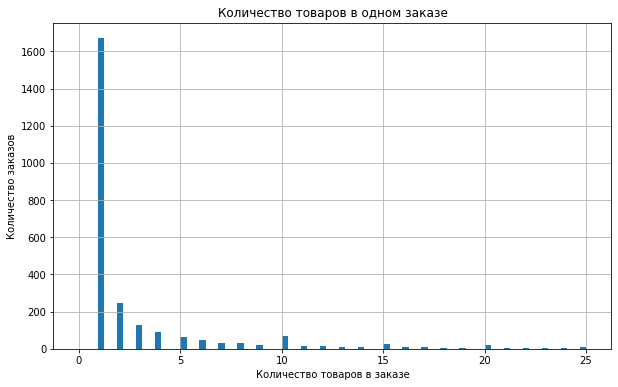

In [44]:
order=data.pivot_table(index='order_id',values='quantity', aggfunc='sum')
order.hist(bins = 80, figsize = (10,6),range = (0,25))
plt.title('Количество товаров в одном заказе')
plt.xlabel('Количество товаров в заказе')
plt.ylabel('Количество заказов') 
plt.show()

Чаще всего в одном заказе фигурирует всего 1 товар, реже покупают до 10шт, большие значения уже редки

### Динамика выручки магазина 

Оценим динамику выручки интернет магазина

In [45]:
revenue_d=data.pivot_table(index='YMD',values='revenue', aggfunc='sum').reset_index()

In [46]:
fig = px.line(revenue_d, # загружаем данные
              x='YMD', # указываем столбец с данными для оси X
              y='revenue' # указываем столбец с данными для оси Y
              ) # отображаем маркеры (точки) на графике
#fig.update_layout(title='Изменение выручки по месяцам',
                   #xaxis_title='Время',
                   #yaxis_title='Выручка')
#fig.show() # выводим график

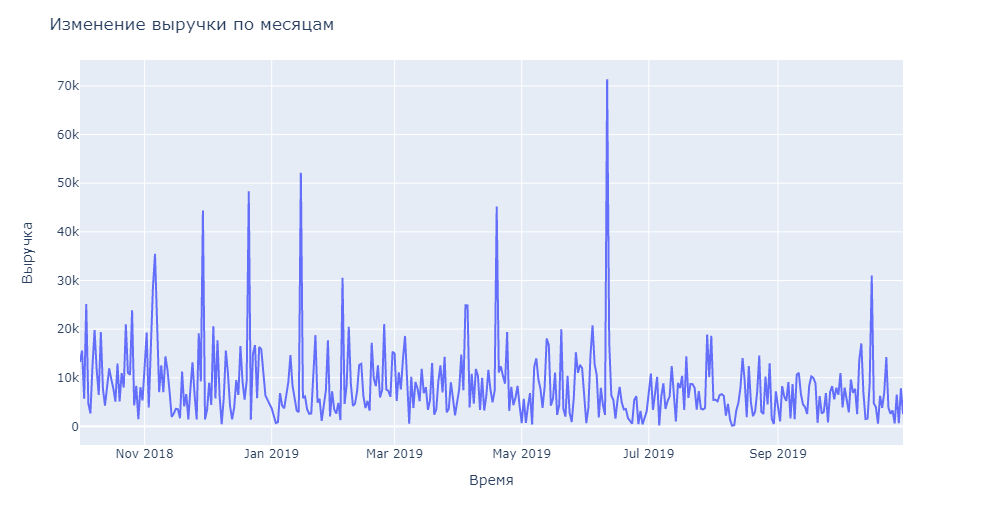

Выручка в разные дни сильно разнится минимальное значение выручки были достигнуто 30 декабря 2018 года, максимальная уже в январе 2019. В основном выручка магазина была в пределе 3-15 тысяч

### График числа проданных товаров 

Оценим количество проданного

In [47]:
quantity_d=data.pivot_table(index='YMD',values='quantity', aggfunc='sum').reset_index()

In [117]:
fig = px.line(quantity_d, # загружаем данные
              x='YMD', # указываем столбец с данными для оси X
              y='quantity' # указываем столбец с данными для оси Y
              ) # отображаем маркеры (точки) на графике
#fig.update_layout(title='Изменение количества проданных товаров по месяцам',
                   #xaxis_title='Время',
                   #yaxis_title='Количество')
#fig.show() # выводим график

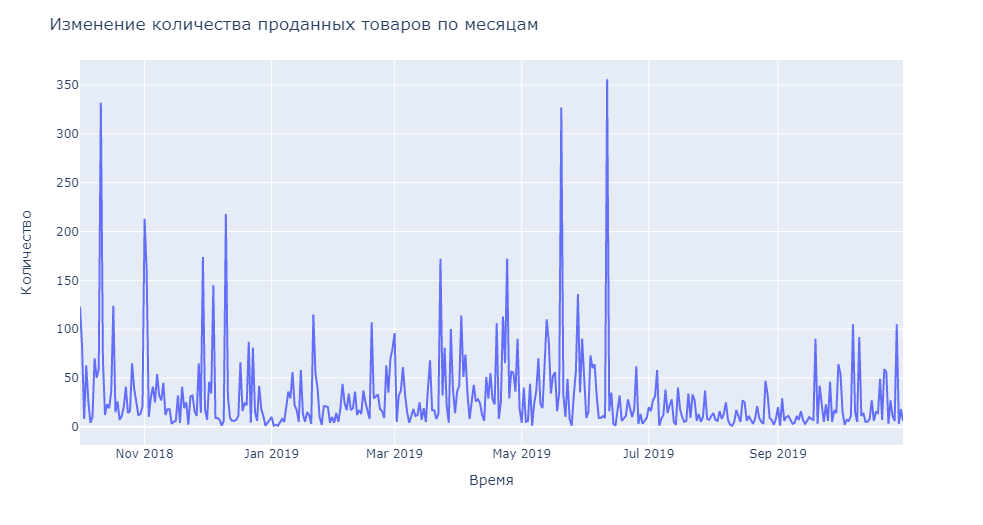

В месяц магазин продавал обычно не более 40 товаров. Больше всего товаров было продано в 13 мая. Также бывало что магазин продавал за день всего один товар

### Мединный чек клиентов по дням

Оценим медианный чек по дням

In [118]:
customer=data.pivot_table(index='YMD',values='revenue',aggfunc='median').reset_index()
fig = px.line(customer, # загружаем данные
              x='YMD', # указываем столбец с данными для оси X
              y='revenue' # указываем столбец с данными для оси Y
              ) # отображаем маркеры (точки) на графике
#fig.update_layout(title='Медианный чек',
                   #xaxis_title='Время',
                   #yaxis_title='Чек')
#fig.show() # выводим график

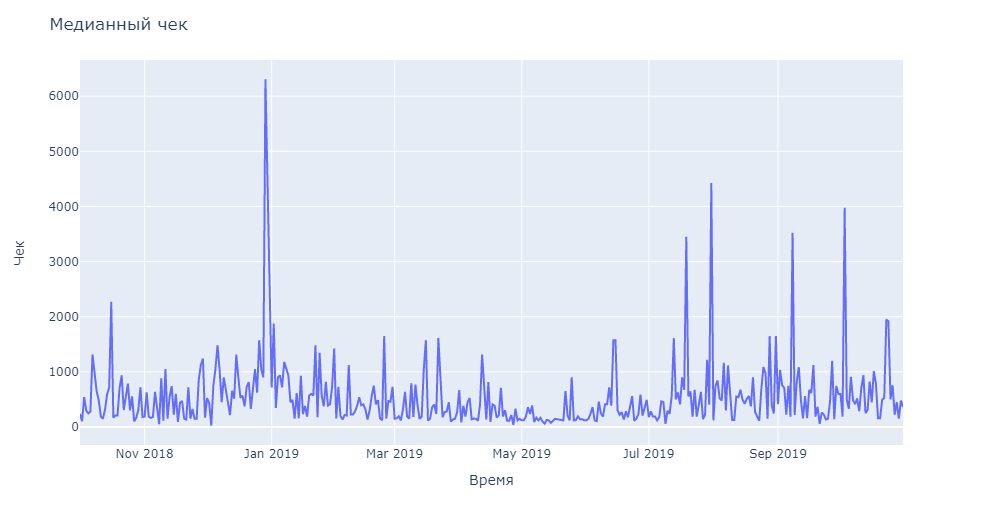

Медианный чек был в пределе 1500

### Стоимость проданных товаров по категориям 

In [50]:
category_piv2=data.pivot_table(index='category', values=['revenue','quantity'], aggfunc='sum')
category_piv2=category_piv2.sort_values(by='revenue',ascending=False)
display(category_piv2)

,quantity,revenue
category,,
предметы для дома,2410,1178788.0
хозтовары,3597,1121475.0
растение,5122,767447.0
посуда,1044,192397.0


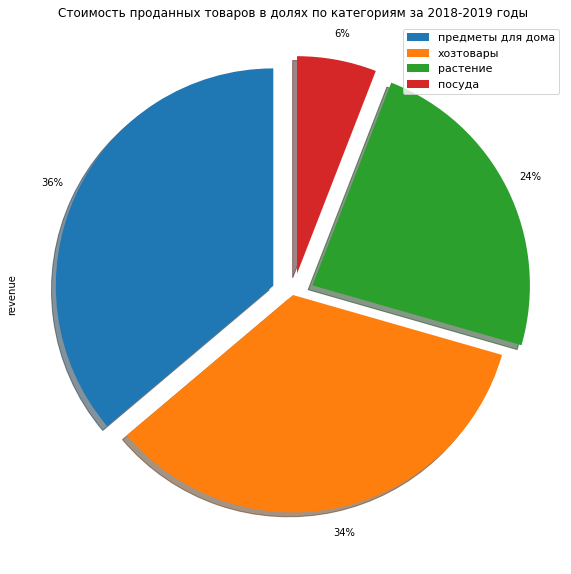

In [51]:
colors = sns.color_palette('pastel')[ 0:5 ]
explode=[0.1, 0, 0.1, 0.1]
category_piv2['revenue'].plot(kind='pie',figsize=(14, 10),autopct='%.0f%%', shadow=True,startangle=90, pctdistance=1.12,labels=None, explode=explode)

plt.title('Стоимость проданных товаров в долях по категориям за 2018-2019 годы')
plt.legend(labels=category_piv2.index, loc='upper right', fontsize=11)
plt.show()

Больше всего денег было выручено от продажи хозтоваров и предметов для дома. 

### Количество проданных товаров по категориям

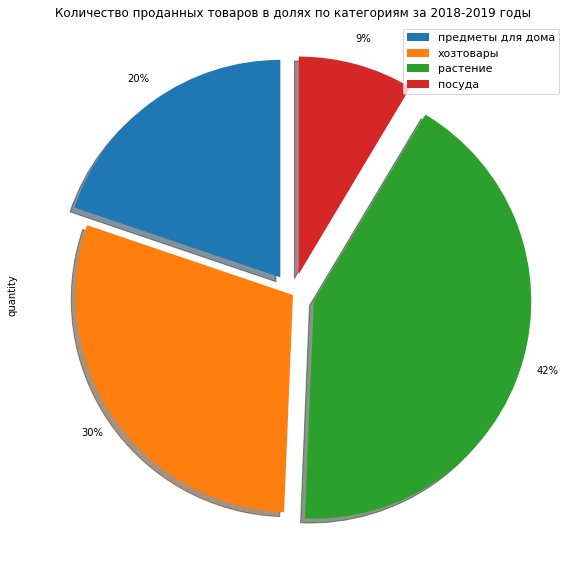

In [52]:
colors = sns.color_palette('pastel')[ 0:5 ]
explode=[0.1, 0, 0.1, 0.1]
category_piv2['quantity'].plot(kind='pie',figsize=(14, 10),autopct='%.0f%%', shadow=True,startangle=90, pctdistance=1.12,labels=None, explode=explode)
plt.title('Количество проданных товаров в долях по категориям за 2018-2019 годы')
plt.legend(labels=category_piv2.index, loc='upper right', fontsize=11)
plt.show()

В количественном соотношении ситуация иначе, больше всего было продано  растений - более 42% 

### Топ 10 товаров по стоимости проаднного

Выделим топ 10 товаров по стоимости проданного

In [53]:
data.pivot_table(index='product',values='revenue',aggfunc='sum').sort_values(by=['revenue'], ascending=False).head(10)

,revenue
product,
простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232.0
вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0
сумка-тележка 2-х колесная gimi argo синяя,48307.0
тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992.0
муляж яблоко 9 см красное,32702.0
набор ножей attribute chef 5 предметов akf522,29248.0
"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см, сталь",24370.0
"сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90",22796.0
"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",20010.0


Интересно, что топ 10 по стоимости занимают сумки-тележки.

### Товары-лидеры по количеству продаж 

In [54]:
data.pivot_table(index='product',values=['quantity'],aggfunc='sum').sort_values(by=['quantity'], ascending=False).head(10)

,quantity
product,
муляж яблоко 9 см красное,618
вешалки мягкие для деликатных вещей 3 шт шоколад,335
"ручка-скоба рс-100 белая *трибатрон*, 1108035",200
"крепеж для пружины дверной, 1107055",170
плечики пластмассовые размер 52 - 54 тула 1205158,160
"пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014",150
муляж яблоко зеленый 9 см полиуретан,148
муляж банан желтый 21 см полиуретан,109
"щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096",105


По количеству проданного лидируют хозтовары

### Топ 10 клиентов с наибольшими тратами в магаизне

In [55]:
customer=data.pivot_table(index='customer_id',values='revenue',aggfunc='sum').sort_values(by='revenue', ascending=False).head(10)
display(customer)

,revenue
customer_id,
4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.0
58a4c3cc-504f-43ea-a74a-bae19e665552,53232.0
146cd9bf-a95c-4afb-915b-5f6684b17444,49432.0
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900.0
8fba3604-ef57-4b9f-b2fe-3402fa8825c8,33680.0
6987e6d6-a63a-4ce2-a2d0-f424092d235e,32718.0
1b2764ad-9151-4051-a46a-9b01b62e6335,24370.0
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,22056.0
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21361.0


Данные клиенты принесли наибольшую выручку. Возможно, что оин являются оптовыми клиентами и покупают товары сравнительно большими партиями

### Продажи товаров по сезонам 

In [56]:
seas=data.pivot_table(index='season',columns='category', values='quantity', aggfunc='sum')
display(seas)



category,посуда,предметы для дома,растение,хозтовары
season,,,,
весна,184,663,2576,619
зима,360,490,708,839
лето,59,317,794,679
осень,272,871,883,1358


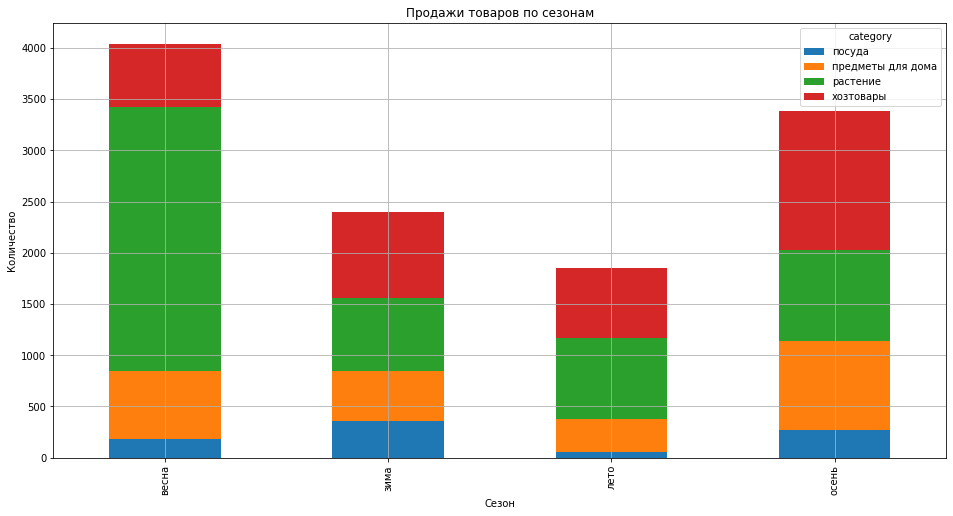

In [57]:
seas.plot(kind='bar', stacked= True, figsize=(16,8), grid=True )
plt.ylabel('Количество')
plt.xlabel('Сезон')
plt.title('Продажи товаров по сезонам')
plt.show()

Больше всего клиенты покупают весной, а именно они покупают растения, летом предпочитают растения и хозтовары. Осенью и зимой клиенты покупают меньше растений в пользу других категорий товаров

### Вывод

При проведенном анализе были сформулированы следующие выводы:
1) Чаще всего в одном заказе фигурирует всего 1 товар, реже покупают до 10шт, большие значения уже редки
2) Выручка в разные дни сильно разнится минимальное значение выручки были достигнуто 30 декабря 2018 года, максимальная уже в январе 2019. В основном выручка магазина была в пределе 3-15 тысяч
3) В месяц магазин продавал обычно не более 40 товаров. Больше всего товаров было продано в 13 мая. Также бывало что магазин продавал за день всего один товар
4) Медианный чек был в пределе 1500
5) Больше всего денег было выручено от продажи растений, посуды и предметов для дома. Меньше всего посуды. В количественном соотношении ситуация иначе, больше всего было продано растений - более 61%
6) По количеству проданного лидируют растения
7) Больше всего клиенты покупают весной, а именно они покупают растения, летом предпочитают также растения. Осенью и зимой клиенты покупают меньше растений в пользу других категорий товаров

## Сегментация клиентов

### Подготовка данных

Сегментируем клиентов методом k-means. Признаки для сегментации:
1) по среднему чеку
2) количеству товаров в одном заказе
3) сумма всех заказов одного покупателя
4) по средней цене одного товара в заказе.
5) Количество покупок совершенных одним покупателем

In [58]:
customer_check=data.pivot_table(index='customer_id',values='revenue',aggfunc='mean')

In [59]:
customer_price=data.pivot_table(index='customer_id',values='price',aggfunc='mean')

In [60]:
customer_quan=data.pivot_table(index='customer_id',values='quantity',aggfunc='sum')


In [61]:
customer_rd=data.pivot_table(index='customer_id', values='revenue',aggfunc='sum')

In [62]:
customer_cs=data.pivot_table(index='customer_id', values='order_id',aggfunc='count')

Соберем эти данные в единую таблицу

In [63]:
claster_mod1=customer_check.merge(customer_price, on='customer_id',how='left')



In [64]:
claster_mod2=claster_mod1.merge(customer_quan, on='customer_id',how='left')

In [65]:
claster_mod3=claster_mod2.merge(customer_rd, on='customer_id',how='left')
display(claster_mod3)

,revenue_x,price,quantity,revenue_y
customer_id,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,138.75,138.75,4,555.0
001cee7f-0b29-4716-b202-0042213ab038,442.00,442.00,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,914.00,457.00,2,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,1649.00,1649.00,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,2324.00,1162.00,2,2324.0
...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,1649.00,1649.00,1,1649.0
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,397.00,397.00,1,397.0
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,389.00,389.00,1,389.0


In [66]:
claster_mod3=claster_mod3.merge(customer_cs, on='customer_id',how='left')
claster_mod3.head()

,revenue_x,price,quantity,revenue_y,order_id
customer_id,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,138.75,138.75,4,555.0,4
001cee7f-0b29-4716-b202-0042213ab038,442.00,442.00,1,442.0,1
00299f34-5385-4d13-9aea-c80b81658e1b,914.00,457.00,2,914.0,1
002d4d3a-4a59-406b-86ec-c3314357e498,1649.00,1649.00,1,1649.0,1
003bbd39-0000-41ff-b7f9-2ddaec152037,2324.00,1162.00,2,2324.0,1


### Функция для сегментации

используем метод k-means

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(claster_mod3)

scaled_data = scaler.transform(claster_mod3)
display(scaled_data)


array([[-0.46706337, -0.55218606, -0.06420505, -0.28427999,  0.60179416],
       [-0.3141315 , -0.29038921, -0.24107085, -0.32404086, -0.27862886],
       [-0.07609739, -0.27743966, -0.18211558, -0.15796007, -0.27862886],
       ...,
       [-0.3408599 , -0.33614431, -0.24107085, -0.34268976, -0.27862886],
       [-0.04583882,  0.16888836, -0.24107085, -0.1368481 , -0.27862886],
       [-0.24604971, -0.17384321, -0.24107085, -0.27653894, -0.27862886]])

In [68]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [69]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

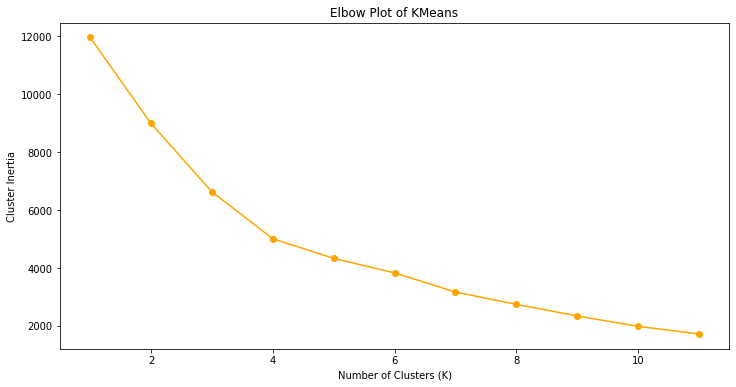

In [70]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

По графику можно сказать что оптимальным будет разделить клиентов на 4 кластеров

In [71]:
kmeans_model = KMeans(n_clusters = 4,random_state=0)

kmeans_model.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

### Результаты сегментации и анализ

In [72]:
claster_mod3["clusters"] = kmeans_model.labels_

In [73]:
claster_mod3['clusters'].value_counts()

0    2059
1     227
3      94
2      12
Name: clusters, dtype: int64

Данные разделились на 4 кластера.

Создадим новйы столбец с кластерами в исходном датафрейме

In [75]:
cl_0=claster_mod3[claster_mod3['clusters']==0].reset_index()
cl_0[['customer_id']]
t=cl_0['customer_id'].tolist()

In [76]:
cl_3=claster_mod3[claster_mod3['clusters']==3].reset_index()
cl_3[['customer_id']]
tk=cl_3['customer_id'].tolist()

In [77]:
cl_4=claster_mod3[claster_mod3['clusters']==2].reset_index()
cl_4[['customer_id']]
tc=cl_4['customer_id'].tolist()

In [78]:
cl_2=claster_mod3[claster_mod3['clusters']==1].reset_index()
cl_2[['customer_id']]
tl=cl_2['customer_id'].tolist()

In [79]:
def sek(row):
    sea=row['customer_id']
    if sea in t:
        return 'Первый кластер'
    elif sea in tl:
        return 'Второй кластер'
    elif sea in tk:
        return 'Третий кластер'
    elif sea in tc:
        return 'Четвертый кластер'

In [80]:
data['cluster']=data.apply(sek, axis = 1)

In [81]:
data.head()

,date,customer_id,order_id,product,quantity,price,YMD,year,month,week_date,revenue,season,product1,category,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,10,Monday,142.0,осень,комнатное,растение,Первый кластер
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,2018,10,Monday,194.0,осень,комнатное,растение,Первый кластер
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень,радермахера,растение,Первый кластер
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,10,Monday,179.0,осень,хризолидокарпус,растение,Первый кластер
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,10,Monday,112.0,осень,циперус,растение,Первый кластер


Оценим получившиеся значения

In [82]:
data.pivot_table(index='cluster',values=['revenue','price', 'quantity'],aggfunc='median').sort_values(by='revenue',ascending=False).reset_index()

,cluster,price,quantity,revenue
0,Второй кластер,3074.0,1,3524.0
1,Четвертый кластер,269.0,2,1068.5
2,Первый кластер,188.0,1,300.0
3,Третий кластер,112.0,1,120.0


In [83]:
data.pivot_table(index='cluster',values=['quantity'],aggfunc='sum').sort_values(by='quantity',ascending=False).reset_index()

,cluster,quantity
0,Первый кластер,7715
1,Четвертый кластер,2031
2,Третий кластер,1957
3,Второй кластер,470


In [84]:
data.pivot_table(index='cluster',values=['order_id'],aggfunc='count').sort_values(by='order_id',ascending=False).reset_index()

,cluster,order_id
0,Первый кластер,2913
1,Третий кластер,1440
2,Второй кластер,244
3,Четвертый кластер,66


В первом кластере в основном производят единичные покупки товаров по небольшой цене, то же можно сказать и про клиентов третьего кластера. Клиенты второго кластера совершают также в основном единичные покупки, но покупают самые дорогие товары. В четвертом кластере находятся оптовики.

In [85]:
graph=data.pivot_table(index='cluster', values='quantity', aggfunc='sum', columns='category')
graph['sum']=graph['посуда']+graph['предметы для дома']+graph['растение']+graph['хозтовары']
graph=graph.sort_values(by='sum',ascending=False)
display(graph)

category,посуда,предметы для дома,растение,хозтовары,sum
cluster,,,,,
Первый кластер,937,1321,3132,2325,7715
Четвертый кластер,39,800,194,998,2031
Третий кластер,55,132,1686,84,1957
Второй кластер,13,157,110,190,470


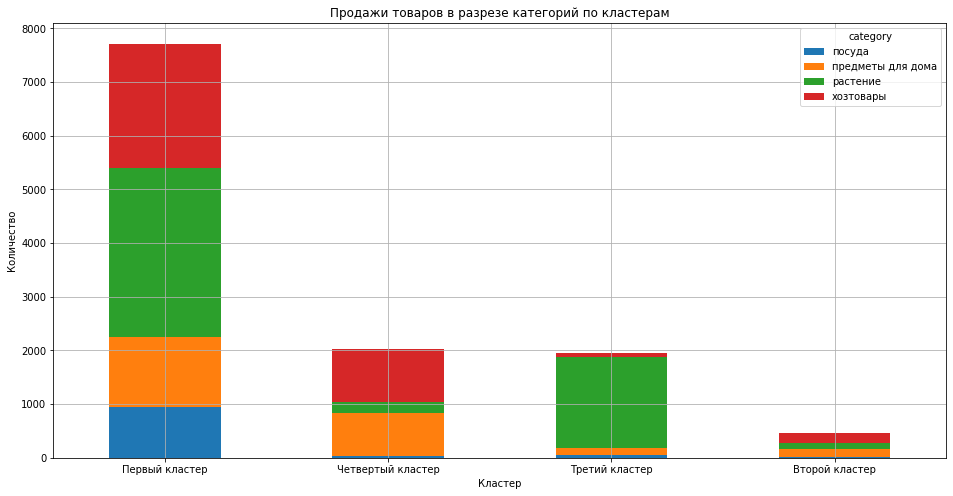

In [86]:
graph[['посуда','предметы для дома','растение','хозтовары']].plot(kind='bar', stacked= True, figsize=(16,8), grid=True )
plt.ylabel('Количество')
plt.xlabel('Кластер')
plt.title('Продажи товаров в разрезе категорий по кластерам')
plt.xticks(rotation=0) 
plt.show()

В первом кластере предпочитают покупать преимущественно растения и хозтовары, хотя продажи других типов товаров также значительны. Во втором и четвертом кластере предпочитают покупать хозтовары и предметы для дома.В третьем кластере покупают только растения. 

#### Первый кластер 

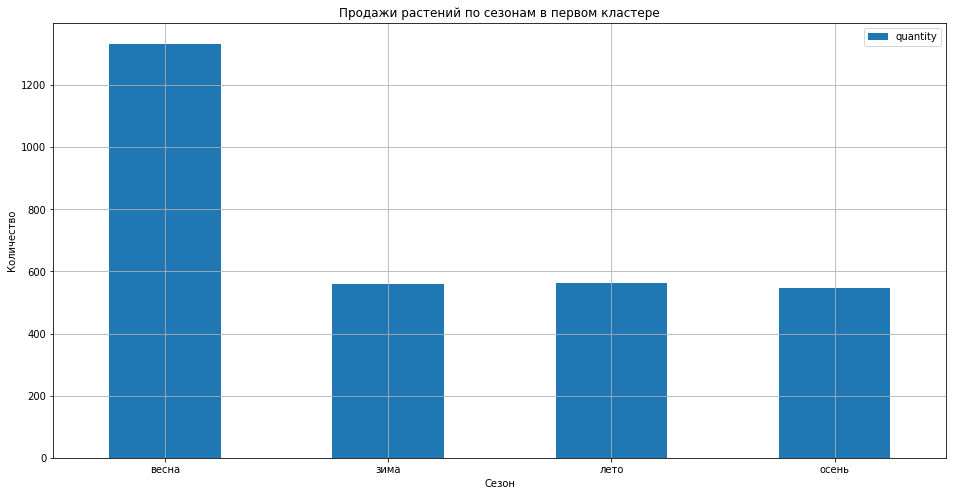

In [87]:
first=data[data['cluster']=='Первый кластер']
first[first['category']=='растение'].pivot_table(index='season', values='quantity', aggfunc='sum').plot(kind='bar', figsize=(16,8), grid=True)
plt.ylabel('Количество')
plt.xlabel('Сезон')
plt.title('Продажи растений по сезонам в первом кластере')
plt.xticks(rotation=0) 
plt.show()

В первом кластере товары из категории растения лучше предлагать весной

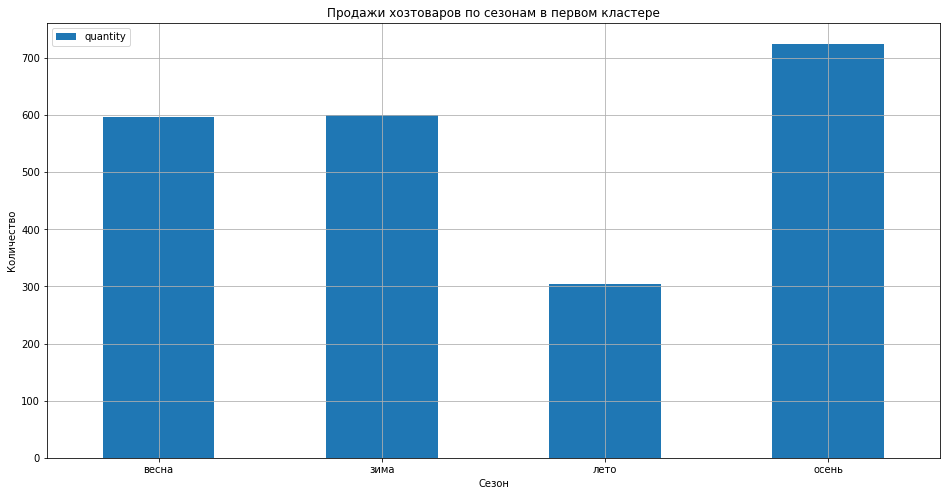

In [88]:
first[first['category']=='хозтовары'].pivot_table(index='season', values='quantity', aggfunc='sum').plot(kind='bar', figsize=(16,8), grid=True)
plt.ylabel('Количество')
plt.xlabel('Сезон')
plt.title('Продажи хозтоваров по сезонам в первом кластере')
plt.xticks(rotation=0) 
plt.show()

В первом кластере хозтовары  покупают весной, зимой и большего всего осенью

#### Второй кластер 

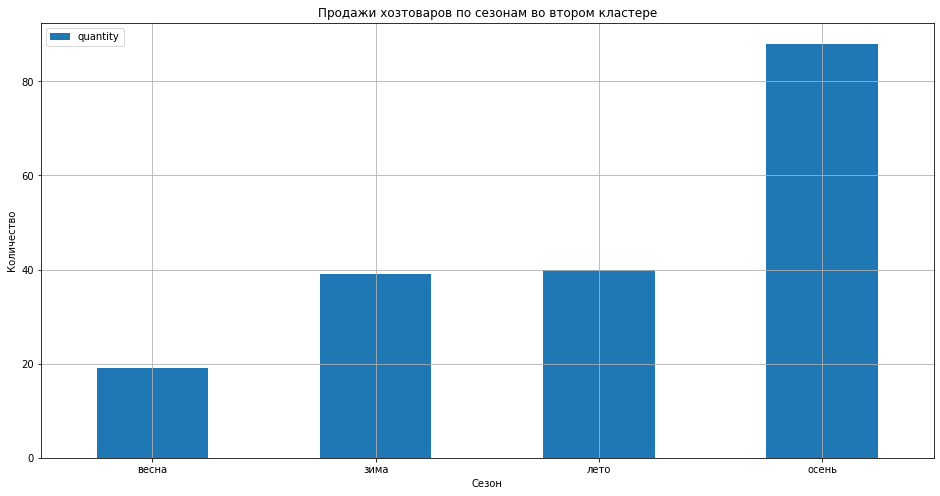

In [89]:
second=data[data['cluster']=='Второй кластер']
second[second['category']=='хозтовары'].pivot_table(index='season', values='quantity', aggfunc='sum').plot(kind='bar', figsize=(16,8), grid=True)
plt.ylabel('Количество')
plt.xlabel('Сезон')
plt.title('Продажи хозтоваров по сезонам во втором кластере')
plt.xticks(rotation=0) 
plt.show()

Во втором кластере хозтовары покупают в основном осенью

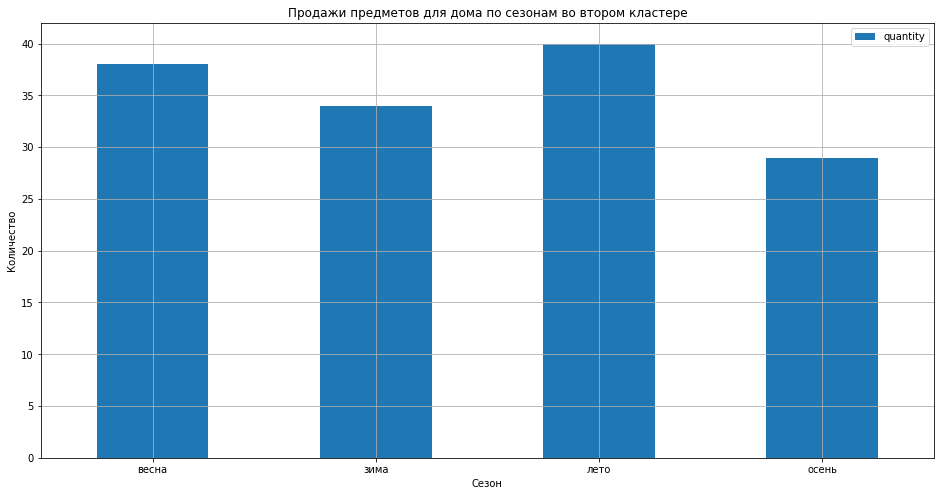

In [90]:
second[second['category']=='предметы для дома'].pivot_table(index='season', values='quantity', aggfunc='sum').plot(kind='bar', figsize=(16,8), grid=True)
plt.ylabel('Количество')
plt.xlabel('Сезон')
plt.title('Продажи предметов для дома по сезонам во втором кластере')
plt.xticks(rotation=0) 
plt.show()

Что касается предметов для дома есть смысл предлагать товары весной, зимой и летом

#### Третий кластер 

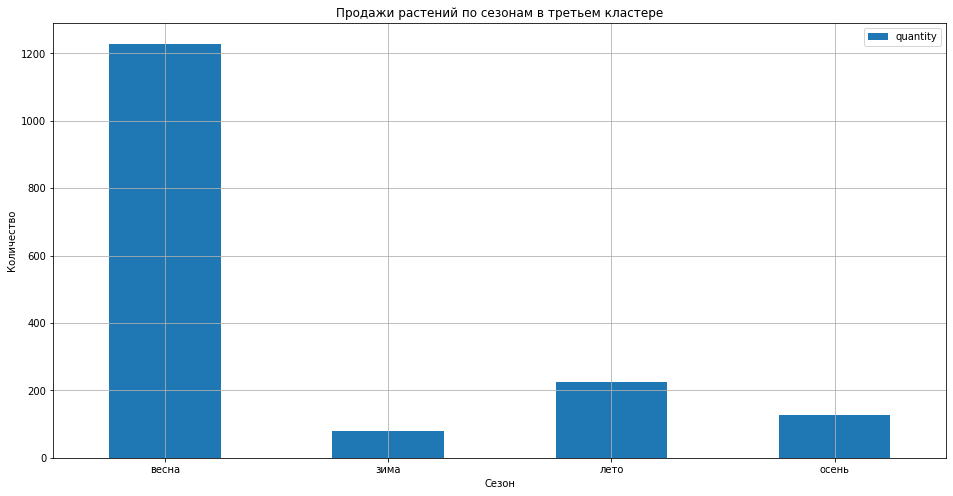

In [91]:
third=data[data['cluster']=='Третий кластер']
third[third['category']=='растение'].pivot_table(index='season', values='quantity', aggfunc='sum').plot(kind='bar', figsize=(16,8), grid=True)
plt.ylabel('Количество')
plt.xlabel('Сезон')
plt.title('Продажи растений по сезонам в третьем кластере')
plt.xticks(rotation=0) 
plt.show()

Клиенты из третьего кластера растения покупают преимущественно весной

#### Четвертый кластер 

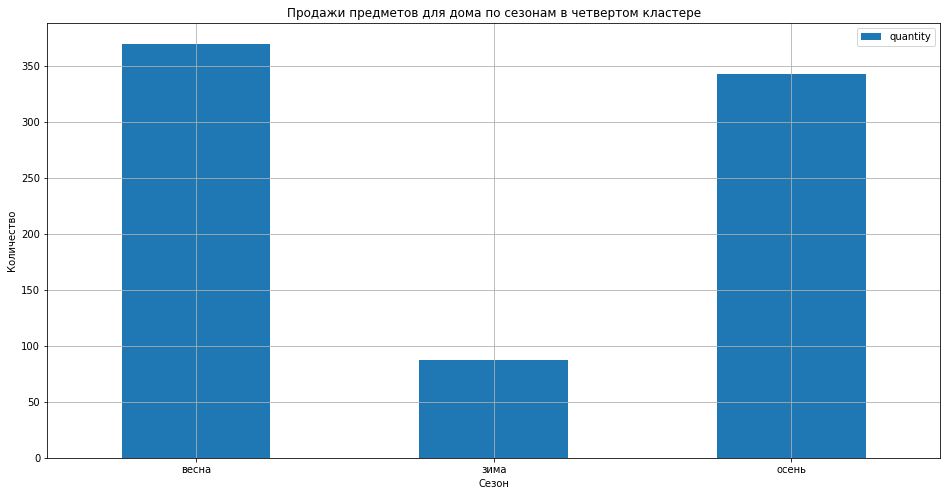

In [92]:
fourth=data[data['cluster']=='Четвертый кластер']
fourth[fourth['category']=='предметы для дома'].pivot_table(index='season', values='quantity', aggfunc='sum').plot(kind='bar', figsize=(16,8), grid=True)
plt.ylabel('Количество')
plt.xlabel('Сезон')
plt.title('Продажи предметов для дома по сезонам в четвертом кластере')
plt.xticks(rotation=0) 
plt.show()

Клиенты из четвертого кластера покупают товары из категории предметы для дома весной и осенью

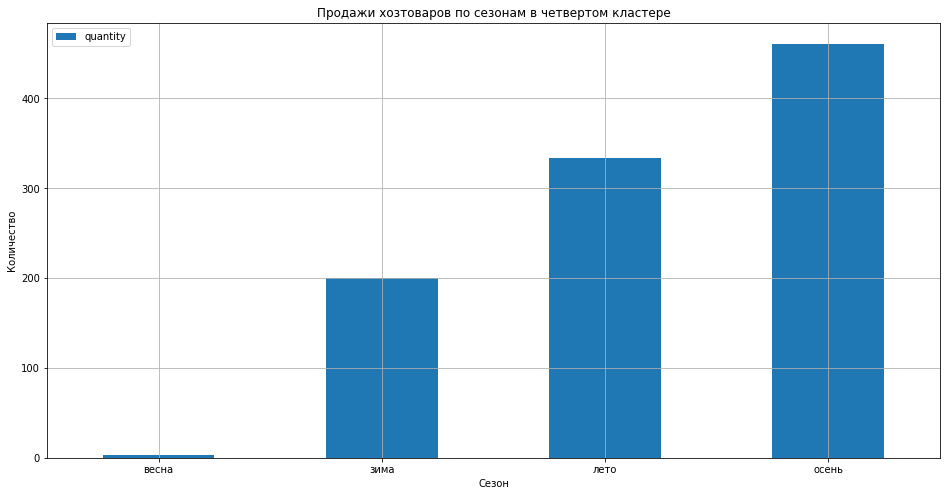

In [93]:
fourth=data[data['cluster']=='Четвертый кластер']
fourth[fourth['category']=='хозтовары'].pivot_table(index='season', values='quantity', aggfunc='sum').plot(kind='bar', figsize=(16,8), grid=True)
plt.ylabel('Количество')
plt.xlabel('Сезон')
plt.title('Продажи хозтоваров по сезонам в четвертом кластере')
plt.xticks(rotation=0) 
plt.show()

Клиенты из четвертого кластера товары из категории хозтвоары покупают летом и осенью

In [94]:
#data.pivot_table(index=['cluster','season'], values='quantity', aggfunc='sum', columns='category')

### Вывод

Клиенты были сегментированы на 4 категории. В каждой из них есть клиенты с разными предпочтениями и разными тратами. На основании этих данных можно ориентироваться при отправке рассылок. В частности было выяснено, что клиентам из первого кластера предпочитают покупать растения и хозтовары. Растения им лучше предлагать весной, а хозтовары осенью. 

Клиенты из второго кластера предпочитают покупать хозтовары и предметы для дома. Хозтовары покупаются в основном осенью. Товары из категории предметы для дома есть смысл предлагать весной, зимой и летом

Клиенты из третьего кластера покупают только растения. Предагать им можно весной.

Клиенты из четвертого кластера покупают предметы для дома и хозтовары. Предметы для дома лучше предлагать им весной и осенью,  хозтовары также осенью.
 


<div class="alert alert-danger">
    
  <b>Комментарий тимлида</b>
 
    
  ❌ Нам надо определить популярные категории и проверить их сезонность по получившимся кластерам. Как иначе давать рекомендации заказчику?


  ❌ Нет проверки стат.гипотез, мы не убедились в корректности разбиения на кластеры.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Добавил визуализацию и стат. гипотезы
</div>

<div class="alert alert-success">
  
  <b>Комментарий тимлида v.2</b>
    
  ✔️ Изучили наши кластеры.
 
</div>

## Проверка гипотез 

### Средний чек 

In [95]:
claster_1=first.pivot_table(index='date', values='revenue',aggfunc='mean').reset_index()

In [96]:
claster_2=second.pivot_table(index='date', values='revenue',aggfunc='mean').reset_index()

In [97]:
claster_3=third.pivot_table(index='date', values='revenue',aggfunc='mean').reset_index()

In [98]:
claster_4=fourth.pivot_table(index='date', values='revenue',aggfunc='mean').reset_index()

Нулевая гипотеза H₀: Средние чеки кластеров не отличаются; Альтернативная гипотеза H₁: средние чеки кластеров отличаются

<div class="alert alert-success">
  
  <b>Комментарий тимлида v.2</b>
    
  ✔️ Нулевая и альтернативная гипотезы сформулированы. 

</div>

In [99]:
def claster(row, row1):
    number1=row['revenue']
    number2=row1['revenue']
    alpha=.05/6
    results = stats.mannwhitneyu(number1, number2)[1]
    print('p-value:', "{0:.2f}".format(results))
    if (results < alpha):
        print('Отвергаем нулевую гипотезу. Средний чек отличается')
    else:
        print('Не получилось отвергнуть нулевую гипотезу. Средний чек не отличается')

In [100]:
claster(claster_1,claster_2)

p-value: 0.00
Отвергаем нулевую гипотезу. Средний чек отличается


In [101]:
claster(claster_1,claster_3)

p-value: 0.00
Отвергаем нулевую гипотезу. Средний чек отличается


In [102]:
claster(claster_1,claster_4)

p-value: 0.00
Отвергаем нулевую гипотезу. Средний чек отличается


In [103]:
claster(claster_2,claster_3)

p-value: 0.00
Отвергаем нулевую гипотезу. Средний чек отличается


In [104]:
claster(claster_2,claster_4)

p-value: 0.00
Отвергаем нулевую гипотезу. Средний чек отличается


In [105]:
claster(claster_3,claster_4)

p-value: 0.00
Отвергаем нулевую гипотезу. Средний чек отличается


Гипотеза опровергнута

<div class="alert alert-warning">
    
  <b>Комментарий тимлида v.2</b>
    
  ⚠️ При округлении p-value стоит оставлять больше знаков после запятой. p-val=0 не может быть.

    
  ⚠️  Обрати внимание, что тут у нас идет множественная проверка гипотез, уровень стат. значимости надо рассчитывать исходя из этого.
  
Вот тут можно почитать: http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7
</div>



### Среднее количество покупаемых товаров 

In [106]:
claster_1=first.pivot_table(index='customer_id', values='quantity',aggfunc='mean').reset_index()

In [107]:
claster_2=second.pivot_table(index='customer_id', values='quantity',aggfunc='mean').reset_index()

In [108]:
claster_3=third.pivot_table(index='customer_id', values='quantity',aggfunc='mean').reset_index()

In [109]:
claster_4=fourth.pivot_table(index='customer_id', values='quantity',aggfunc='mean').reset_index()

Нулевая гипотеза H₀: Среднее количество покупаемых товаров в кластерах не отличается; Альтернативная гипотеза H₁: Среднее количество покупаемых товаров в кластерах отличается

In [110]:
def claster2(row, row1):
    alpha=.05/6
    number1=row['quantity']
    number2=row1['quantity']
    results = stats.mannwhitneyu(number1, number2)[1]
    print('p-value:', "{0:.2f}".format(results))
    if (results < alpha):
        print('Отвергаем нулевую гипотезу. Среднее количество покупаемых товаров в кластерах отличается')
    else:
        print('Не получилось отвергнуть нулевую гипотезу. Среднее количество покупаемых товаров в кластерах не отличается')

In [111]:
claster2(claster_1,claster_2)

p-value: 0.00
Отвергаем нулевую гипотезу. Среднее количество покупаемых товаров в кластерах отличается


In [112]:
claster2(claster_1,claster_3)

p-value: 0.00
Отвергаем нулевую гипотезу. Среднее количество покупаемых товаров в кластерах отличается


In [113]:
claster2(claster_1,claster_4)

p-value: 0.00
Отвергаем нулевую гипотезу. Среднее количество покупаемых товаров в кластерах отличается


In [114]:
claster2(claster_2,claster_3)

p-value: 0.00
Отвергаем нулевую гипотезу. Среднее количество покупаемых товаров в кластерах отличается


In [115]:
claster2(claster_2,claster_4)

p-value: 0.00
Отвергаем нулевую гипотезу. Среднее количество покупаемых товаров в кластерах отличается


In [116]:
claster2(claster_3,claster_4)

p-value: 0.00
Отвергаем нулевую гипотезу. Среднее количество покупаемых товаров в кластерах отличается


Гипотеза опровергнута

## Результаты работы

На этапе предобработке были изменены: тип данных с толбце с датой, добавили новые столбцы: Дата, год, месяц, день недели, стоимость заказа, сезон. Также были  удалены дубликаты 1865 ед., убраны дублирующие заказы. На основании имеющихся товаров были создано несколько категорий: Растения, предметы для дома, хозтовары, посуда. Были удалены строки с слишком выделяющимися значениями, которые могли бы отрицательно повлиять на результаты анализа

На этапе исследовательского анализа данных были сформулированы следующие выводы:
1) Чаще всего в одном заказе фигурирует всего 1 товар, реже покупают до 10шт, большие значения уже редки
2) Выручка в разные дни сильно разнится минимальное значение выручки были достигнуто 30 декабря 2018 года, максимальная уже в январе 2019. В основном выручка магазина была в пределе 3-15 тысяч
3) В месяц магазин продавал обычно не более 40 товаров. Больше всего товаров было продано в 13 мая. Также бывало что магазин продавал за день всего один товар
4) Медианный чек был в пределе 1500
5) Больше всего денег было выручено от продажи растений, посуды и предметов для дома. Меньше всего посуды. В количественном соотношении ситуация иначе, больше всего было продано растений - более 61%
6) По количеству проданного лидируют растения
7) Больше всего клиенты покупают весной, а именно они покупают растения, летом предпочитают также растения. Осенью и зимой клиенты покупают меньше растений в пользу других категорий товаров

В пункте сегментация клиентов, покупатели твоаров были распределены на 4 кластера:

1) В первом кластере средняя цена покупаемого товара составляет 188ед., при среднем чеке в 300ед. В данном кластере клиенты предпочитают покупать растения и хозтовары. Растения чаще покупаются весной, хозтовары  покупаются зимой, весной и особенно осенью.

2) Во втором кластере средняя цена покупаемого товара составляет 3074 ед., при среднем чеке в 3524 ед. Клиенты предпочитают покупать хозтовары и предметы для дома. Хозтовары покупаются осенью, предметы для дома весной, зимой и летом.

3) В третьем кластере средняя цена покупаемого товара составляет 112 ед., при среднем чеке составляющем 120 ед. Клиенты покупают в основном только растения, больше всего-весной.

4) В четвертом кластере средняя цена товара составляет 269 ед. При среднем чеке в 1068ед. Данные клиенты оптовики, покупают хозтовары и предметы для дома. Товары из предметов для дома покупаются только весной и осенью. Хозтовары осенью и летом.

 
Рекомендации:

1) В первом и третьем кластере есть смысл весной усиливать работу над привлечением клиентов по категории растений. Так как именно на этот период приходится наибольшее количество купленных товаров этой категории. 

2) Есть также смысл увеличить ассортимент товаров категории предметы для дома, покупатели данных товаров принесли больше всего выручки компании за весь период. Это положительно повлияет на рост продаж в 2 и 4 кластерах

3) Рекомендуется привлекать больше оптовых клиентов, доля которых в настоящий период в общем объеме продаж незначительная, т.е. увеличивать средний чек в кластере 4

4) Следует отметить, что основная часть клиентов совершает покупку только одной единицы товара, необходимо активнее предлагать сопутствующие товары, предлагать скидки за каждый последующий товар и т.д.



<div class="alert alert-danger">
    
  <b>Комментарий тимлида</b>

  ❌ Заказчику нужны подробные описание и рекомендации по кластерам. У какого кластера, на какую среднюю сумму, как часто и с каким средним прайсом покупают. Каким клиентам когда и какие категории рассылать в рекламных предложениях. Как и для какого кластера можно попытаться увеличить количество продаваемого товара, повысить возвращаемость покупателей и т.д. Это же была наша основная цель.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  добавил рекомендации и более подробно описал кластеры
</div>
<div class="alert alert-success">
  
  <b>Комментарий тимлида v.2</b>
    
  ✔️  Отличные общие выводы и рекомендации! 🔥 Этого заказчик от нас и ждет! 🙂
 
</div>

<div style="border:solid black 2px; padding: 20px">
     
  <b>Чек-лист доработок</b>
    
  📃 Презентацию после переделки проекта надо откорректировать.

  📃 Пересмотреть обрезку выбросов.

  📃 Добавить в анализ количество покупок на пользователя.
    
  📃 Пересмотреть количество получаемых кластеров
    
  📃 По каждому кластеру посмотреть предпочтительные категории и сезонность.
    
  📃 Провести проверку стат.гипотезами получившихся кластеров.
    
  📃 В общем выводе, добавить подробные описание и рекомендации для каждого кластера отдельно.
    
    
Жду твой проект на повторное ревью. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится.
</div>